In [17]:
import pandas

print('This model predicts the basketball player most similar in stats to the player you want to search for using Euclidean Distance being applied on a dataset with stats of NBA 2020-21 Season.\n')

print('We can use 3 different datasets-\n1.\tPer Game Stats\n2.\tPer 36 Minutes Stats \n3.\tAdvanced Stats \n')

print('Enter your choice of dataset to be used for analysis-\n1 for Per Game Stats \n2 for Per 36 Minutes Stats \n3 for Advanced Stats \n')

argument = int(input())

if (argument == 1):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per_game.csv';
    data = 'Per Game Statistics'
    print('You selected the Per Game Stats.\n')
    parameters = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
elif(argument == 2):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per36min.csv';
    data = 'Per 36 minutes Statistics'
    print('You selected the Per 36 Minutes Statistics.\n')
    parameters = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
elif(argument == 3):
    dataset = '/Users/arjunkhanchandani/Desktop/archive/nba2021_advanced.csv';
    data = 'Advanced Statistics'
    print('You selected the Advanced Stats.\n')
    parameters = ['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
    

else:
    print('Wrong Option')

with open(dataset, 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

print('The different categories of stats in the dataset-\n')

stats = []
stats = nba.columns.values

for categories in stats:
    print(categories) 

This model predicts the basketball player most similar in stats to the player you want to search for using Euclidean Distance being applied on a dataset with stats of NBA 2020-21 Season.

We can use 3 different datasets-
1.	Per Game Stats
2.	Per 36 Minutes Stats 
3.	Advanced Stats 

Enter your choice of dataset to be used for analysis-
1 for Per Game Stats 
2 for Per 36 Minutes Stats 
3 for Advanced Stats 



 2


You selected the Per 36 Minutes Statistics.

The different categories of stats in the dataset-

Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


In [18]:
print('Enter the player who you want to find the player most similar to-')

player_name = str(input())

selected_player = nba[nba["Player"] == player_name].iloc[0]

nba_numeric = nba[parameters]

nba_normalized = (nba_numeric - nba_numeric.mean()) / nba_numeric.std()

from scipy.spatial import distance

nba_normalized.fillna(0, inplace=True)

player_normalized = nba_normalized[nba["Player"] == player_name]

euclidean_distances = nba_normalized.apply(lambda row: distance.euclidean(row, player_normalized), axis=1)

distance_frame = pandas.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)

second_smallest = distance_frame.iloc[1]["idx"]
most_similar_to_player = nba.loc[int(second_smallest)]["Player"]

print('The player most similar to', player_name, 'using Euclidean Distance according to', data,'is', most_similar_to_player, 'of the team', nba.loc[int(second_smallest)]["Tm"], '\n')

Enter the player who you want to find the player most similar to-


 Kevon Looney


The player most similar to Kevon Looney using Euclidean Distance according to Per 36 minutes Statistics is Juan Toscano-Anderson of the team GSW 




Now we will train the Per Game Statistics Dataset for year 2019-20 using The KNN Regression Model to predict the Pts in the dataset for the year 2020-21 using all the other Stats Categories


The test dataset has-
 651 different players stats.

              Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
318     Justin James  SG   23  SAC  36   0   6.4  1.0   2.3  0.417  ...   
139      Mike Conley  PG   32  UTA  47  41  29.0  4.9  12.1  0.409  ...   
432     Juwan Morgan  PF   22  UTA  21   0   6.4  0.7   1.2  0.577  ...   
246       Jeff Green   C   33  HOU  18   2  22.6  4.7   8.3  0.564  ...   
182     Goran Dragić  PG   33  MIA  59   3  28.2  5.4  12.3  0.441  ...   
..               ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
44   Marco Belinelli  SG   33  SAS  57   0  15.5  2.2   5.5  0.392  ...   
322        Ty Jerome  PG   22  PHO  31   0  10.6  1.2   3.6  0.336  ...   
450   Shabazz Napier  PG   28  TOT  56  32  24.0  3.4   8.1  0.412  ...   
183 

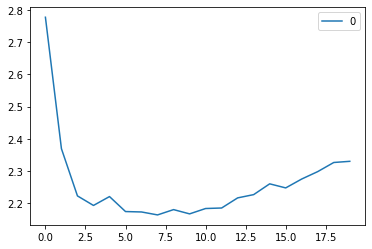

In [19]:
import random
from numpy.random import permutation
import math

per_game_dataset_20 = '/Users/arjunkhanchandani/Desktop/archive/nba_2020_per_game.csv'
per_game_dataset_21 = '/Users/arjunkhanchandani/Desktop/archive/nba2021_per_game.csv'

print('\nNow we will train the Per Game Statistics Dataset for year 2019-20 using The KNN Regression Model to predict the Pts in the dataset for the year 2020-21 using all the other Stats Categories\n')

with open(per_game_dataset_20, 'r') as csvfile:
    nba_knn_20 = pandas.read_csv(csvfile)

with open(per_game_dataset_21, 'r') as csvfile:
    nba_knn_21 = pandas.read_csv(csvfile)

print('\nThe test dataset has-\n', len(nba_knn_20), 'different players stats.\n')
random_indices = permutation(nba.index)
test_cutoff = len(nba_knn_21) + 1

test = nba_knn_20.loc[random_indices[1:test_cutoff]]
print(test)

print('\nThe train dataset has-\n', len(nba_knn_21), 'different players stats.\n')
train = nba_knn_21[1:]

print(train)

x_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

y_column = ["PTS"]

import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

pd.options.mode.chained_assignment = None 

clean_dataset(train[x_columns])
clean_dataset(test[x_columns])

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import pandas as pd

from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] 

for K in range(1,21,1):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    knn.fit(train[x_columns], train[y_column]) 
    predictions = knn.predict(test[x_columns])
    actual = test[y_column]
    
    error = sqrt(mean_squared_error(actual, predictions)) 
    rmse_val.append(error)
    
    print('RMSE value for k = ' , K , 'is:', error)
    
    
curve = pd.DataFrame(rmse_val) 
curve.plot()
min_rmse_val = min(rmse_val)
min_index = rmse_val.index(min_rmse_val)

print('\nThe minimum value of Root Mean Square Value is- ', min_rmse_val, 'at K =', min_index + 1, '\n')
